In [ ]:
"""
Created on Thu Oct 22 12:21:13 2020

@Author: Eu
@Grupa: 341
@Nr.Crt: 159
@Varianta: 15

"""

In [ ]:
# Librării
import numpy as np                       # arrays
import matplotlib.pyplot as plt          # grafic

In [ ]:
"""   Ex 1 -> Rezolvare   """

# Datele Problemei (Varianta 15)
def f(x):
    return x ** 3 - x ** 2 - 7 * x + 7
(a, b) = (-3, 3)  # am folosit acest interval, pentru a putea observa soluțiile pe grafic
eps = 10 ** (-5)


"""
Funcție care caută intervalele pe care funcția are o soluție.
Avem o ecuație de gradul 3, deci trebuie să avem 3 rădăcini.
"""
def cauta_intervale(f, a, b, n):
    """
    Parameters
    ----------
    f : funcția asociată ecuației f(x) = 0.
    a : capătul din stânga intervalului.
    b : capătul din dreapta intervalului.
    n : nr de subintervale în care împărțim intervalul global (a, b).

    Returns
    -------
    Matricea 'intervale' cu 2 linii; prima linie -> capăt st interval curent
    și a doua linie -> capât dr
    și un nr de coloane = nr rădăcini
    """
    
    x = np.linspace(a, b, n + 1)   #returnează n+1 numere, situate la distanțe egale, din cadrul intervalului [a, b]
    for i in range(len(x)):   
        if(f(x[i]) == 0):     #capetele intervalelor mele nu au voie să fie 0; tb să avem soluțiile în intervale, nu la capete
            print("Schimba nr de Intervale")
            break

    matrice = np.zeros((2, 1000))  
    z = 0
    for i in range(n):
        if f(x[i]) * f(x[i + 1]) < 0:  #existență soluție
            matrice[0][z] = x[i]
            matrice[1][z] = x[i + 1]
            z += 1 
    
    matrice_finala = matrice[:, 0:z]   #iau ambele linii și doar coloanele de la 0 la z (numărat mai sus)
    return matrice_finala




# Subpunctul a) Metoda Secantei
def MetSecantei(f, x0, x1, eps):
    """

    Parameters
    ----------
    f : funcția definită mai sus.
    x0, x1 : 2 puncte ce aparțin intervalului (a, b) = (-3, 3); valori de pornire.
    eps : epsilon / toleranța.

    Returns
    -------
    soluția aproximativă
    N = nr de iterații (pași)

    """
    
    N = 2 
    # x(k) = x2, x(k-1) = x1, x(k-2) = x0
    while abs(x1 - x0) >= abs(x0) * eps:
        N += 1
        x2 = (x0 * f(x1) - x1 * f(x0)) / (f(x1) - f(x0))
        
        if x2 < a or x2 > b:
            print("Introduceți alte Valori pt x0 și x1")
            break
            
        # Reatribui Variabilele   
        x0 = x1
        x1 = x2
    
    return x1, N




# Subpunctul b) Metoda Poziției False
def MetPozFalse(f, a, b, eps):
    """

    Parameters
    ----------
    f : funcția definită mai sus.
    a, b : capetele intervalului (definite mai sus).
    eps : epsilon / toleranța.

    Returns
    -------
    soluția aproximativă
    N = nr de iterații

    """
    
    N = 1
    conditie = True
    while conditie:
        x2 = a - (b - a) * f(a) / (f(b) - f(a))
        
        if f(x2) == 0: 
            break

        if f(a) * f(x2) < 0:
            b = x2
        else:
            a = x2

        N += 1
        conditie = abs(f(x2)) >= eps

    return x2, N

In [ ]:
# Subpunctul c) Grafice și Rădăcini

interval = cauta_intervale(f, a, b, 8)
print(interval)
dim = np.shape(interval)[1]

[[-3.    0.75  2.25]
 [-2.25  1.5   3.  ]]


In [ ]:
f1 = np.vectorize(f) 
x_grafic = np.linspace(a, b, 100) # 100 de numere din intervalul [a, b]
y_grafic = f1(x_grafic)          # aplic funcția pe aceste 100 de numere

In [ ]:
# Rădăcini pentru Metoda Secantei 
print("Metoda Secantei:")
print("Ecuația: x ** 3 - x ** 2 - 7 * x + 7 = 0\n")
r = np.zeros(dim)
for i in range(dim):
    r[i], N = MetSecantei(f, interval[0, i], interval[1, i], eps)
    print("Intervalul [{:.2f}, {:.2f}]".format(interval[0, i], interval[1,i]))
    print("Soluția Numerică: x = {:.3f}".format(r[i]))
    print(f'Soluția a fost găsită în {N} pași')
    print("-----------------------------------")

Metoda Secantei:
Ecuația: x ** 3 - x ** 2 - 7 * x + 7 = 0

Intervalul [-3.00, -2.25]
Soluția Numerică: x = -2.646
Soluția a fost găsită în 7 pași
-----------------------------------
Intervalul [0.75, 1.50]
Soluția Numerică: x = 1.000
Soluția a fost găsită în 7 pași
-----------------------------------
Intervalul [2.25, 3.00]
Soluția Numerică: x = 2.646
Soluția a fost găsită în 8 pași
-----------------------------------


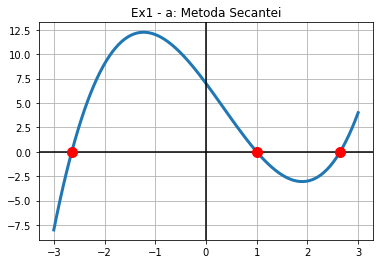

In [ ]:
# Grafic pentru Metoda Secantei
plt.plot(x_grafic, y_grafic, linewidth = 3)  # graficul funcției
plt.grid()
plt.title('Ex1 - a: Metoda Secantei')
plt.axvline(0, color = 'black')   # trasează Oy
plt.axhline(0, color = 'black')   # trasează Ox 
plt.plot(r, f(r), 'o', color = 'red', markersize = 10)
plt.show()
plt.show()

In [ ]:
 # Rădăcini pentru Metoda Poziției False
print("Metoda Poziției False:")
print("Ecuația: x ** 3 - x ** 2 - 7 * x + 7 = 0\n")
r = np.zeros(dim)
for i in range(dim):
    r[i], N = MetPozFalse(f, interval[0, i], interval[1, i], eps)
    print("Intervalul [{:.2f}, {:.2f}]".format(interval[0, i], interval[1,i]))
    print("Solutia Numerica: x = {:.3f}".format(r[i]))
    print(f'Soluția a fost găsită în {N} pași')
    print("-----------------------------------")

Metoda Poziției False:
Ecuația: x ** 3 - x ** 2 - 7 * x + 7 = 0

Intervalul [-3.00, -2.25]
Solutia Numerica: x = -2.646
Soluția a fost găsită în 9 pași
-----------------------------------
Intervalul [0.75, 1.50]
Solutia Numerica: x = 1.000
Soluția a fost găsită în 6 pași
-----------------------------------
Intervalul [2.25, 3.00]
Solutia Numerica: x = 2.646
Soluția a fost găsită în 10 pași
-----------------------------------


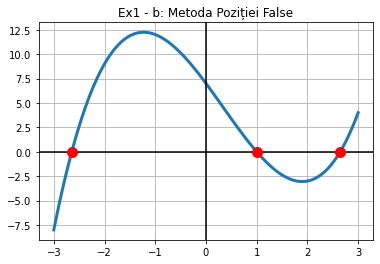

In [ ]:
# Grafic pentru Metoda Poziției False
plt.plot(x_grafic, y_grafic, linewidth = 3)  # graficul funcției
plt.grid()
plt.title('Ex1 - b: Metoda Poziției False')
plt.axvline(0, color = 'black')   # trasează Oy
plt.axhline(0, color = 'black')   # trasează Ox 
plt.plot(r, f(r), 'o', color = 'red', markersize = 10)
plt.show()

In [ ]:
"""   Ex 2 -> Rezolvare   """

# Datele Problemei (Varianta 15)
d = 18
f = -6
c = -3
n = 20
tol = 10 ** (-16)
A = [[0.0 for i in range(n)] for j in range(n)]
for i in range(n):
    A[i][i] = d * 1.0
for i in range(1, n):
    A[i][i - 1] = c * 1.0
    A[i - 1][i] = f * 1.0

b = [1.] * n
b[0] = b[n - 1] = 2.

In [ ]:
# Metoda Substituției Descendente (Funcție Auxiliară pt implementarea Metodei Gauss)
def metSubDesc(A, b, tol):
    """

    Parameters
    ----------
    A : matrice pătratică, superior triunghiulară, cu toate elementele de pe diagonala principală nenule.
    b : vectorul termenilor liberi.
    tol : toleranță = valoare numerică foarte mică în raport cu care vom compara numerele apropiate de 0.

    Returns
    -------
    x = Soluția Sistemului.

    """
    
    # Verificăm dacă matricea este pătratică
    m, n = np.shape(A)
    if m!= n:
        print("Matricea nu este pătratică. Introduceți altă matrice.")
        x = None
        return x
    
    # Verificăm dacă matricea este superior triunghiulară
    for i in range(m):
       for j in range(i):
           if abs(A[i][j] > tol):
               print("Matricea nu este superior triunghiulară.")
               x = None
               return x
    
    # Verificam dacă toate elementele de pe diagonala principală sunt nenule => Si. este compatibil ddeterminat (adică am soluție unică)
    for i in range(n):
        if A[i][i] == 0:
            print("Sistemul nu este compatibil determinat.")
            x = None
            return x
    
    x = np.zeros((n, 1))
    x[n - 1] = b[n - 1] / A[n - 1][n - 1]
    
    k = n - 2
    while k >= 0:
        s = 0
        for j in range(k + 1, n):
            s += x[j] * A[k][j]
            
        x[k] = (1 / A[k][k]) * (b[k] - s)
        k -= 1
    
    return x
    
    
# Definirea Metodei Gauss cu Pivotare Totală
def GaussPivTot(A, b, tol):
    """

    Parameters
    ----------
    Ax = b.

    Returns
    -------
    x = Soluția.

    """
    
    # Verificăm dacă matricea este pătratică
    m, n = np.shape(A)
    if m != n:
        print("Matricea nu este pătratică. Introduceți altă matrice.")
        x = None
        return x
    
    A = np.column_stack((A, b)) # concatenare coloană termeni liberi la matrice A -> matrice extinsă
    n = len(b)
    
    index = np.array(range(n))
    
    for k in range(n - 1):
        p = k
        m = k
      
        for i in range(k, n):
            for j in range(k, n):
                if abs(A[p][m]) < abs(A[i][j]):
                    p = i
                    m = j
    
        if A[p][m] == 0:
            print("Sistem Incompatibil sau Compatibil Nedeterminat!")
            break
        
        """
        !!! ATENȚIE: Tb să pun np.array
        A = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])

        A[[1, 0]] = A[[0, 1]] #linii
        A[:,[2,1]] = A[:,[1,2]] #coloane
        """
        if p != k:
            A[[p, k]] = A[[k, p]] # interschimb linia p cu linia k
        
        if m != k:
            A[:, [m, k]] = A[:, [k, m]] # interschimb coloana m cu coloana k
            index[[m, k]] = index[[k, m]]       
        
        for l in range(k + 1, n):
            m = A[l][k] / A[k][k]
            A[l] = A[l] - m * A[k]
        
        if A[n - 1][n - 1] == 0:
            print("Sistem Incompatibil sau Compatibil Nedeterminat!")
            break
        
        y = metSubDesc(A[:, 0:n], A[:, [n]], tol)
        x = np.zeros(len(y))
        for i in range(n):
            x[index[i]] = y[i]
             
    return x

In [ ]:
x = GaussPivTot(A, b, tol)  
print(x)

[0.15047208 0.1180829  0.11234598 0.11132984 0.11114986 0.11111798
 0.11111235 0.1111114  0.11111137 0.11111173 0.11111284 0.11111599
 0.11112489 0.11115001 0.1112209  0.11142104 0.11198602 0.11358086
 0.1180829  0.13079159]


In [ ]:
"""   Ex 3 -> Rezolvare   """

# Datele Problemei (Varianta 15)
A = np.array([[12., 9., 17.],
              [4., 2., 5.],
              [20., 22., 38.]])
b = np.array([[31.], [12.], [50.]])
tol = 10 ** (-16)

In [ ]:
# Gauss cu Pivotare Parțială
def GaussPP(A, b, tol):
    """

    Parameters
    ----------
    A : matrice pătratică.
    b : vectori termeni liberi.
    tol : toleranță => valoare cu care comparăm numerele nenule.

    Returns
    -------
    x = Soluția Sistemului.

    """
    
    # Verificăm dacă matricea este pătratică
    m, n = np.shape(A)
    if m != n:
        print("Matricea nu este pătratică. Introduceți altă matrice.")
        x = None
        return x
    
    A_extins = np.concatenate((A, b), axis = 1) # axis = 1  =>  pentru concatenare coloane; dacă aveam 0, concatenam linii
    # SAU: A_extins = np.column_stack((A, b)) # concatenare special pentru coloane
    print(f'Matrice Extinsă Ințială: \n{A_extins}\n')
    
    for k in range(n - 1):       # coloane
        max = A_extins[k][k]
        p = k
        for j in range(k + 1, n):
            if abs(A_extins[j][k]) > abs(max):
                max = A_extins[j][k]
                p = j
        
        if abs(max) <= tol:
            print("Sistemul nu admite solutie unică.")
            x = None
            return x
        
        if p != k:
            A_extins[[p, k]] = A_extins[[k, p]]   # swap linia p cu linia k
            for j in range(k + 1, p):
                A_extins[[j, p]] = A_extins[[p, j]]
            print(f'Pasul = {k + 1}: Interschimbare Linii {p+1} <-> {k+1}:\n{A_extins}\n')
        else:
            print(f'Pasul = {k + 1}: NU S-AU INTERSCHIMBAT LINII!!!\n')
        
        for j in range(k + 1, n):
            m = A_extins[j][k] / A_extins[k][k]
            A_extins[j] = A_extins[j] - m * A_extins[k]
        
        # Afisare Matrice Extinsă Intermediară
        print(f'Pasul = {k + 1}: Transformarea Elementară: \n{A_extins}\n')
    
        
    if abs(A_extins[n - 1][n - 1]) <= tol:
        print("Sistemul nu admite soluție unică.")
        x = None
        return x
    
    x = metSubDesc(A_extins[:, 0:n], A_extins[:, n], tol)
    return x

In [ ]:
x = GaussPP(A, b, tol)
print(f'\nSoluția Ecuației: \n{x}')

Matrice Extinsă Ințială: 
[[12.  9. 17. 31.]
 [ 4.  2.  5. 12.]
 [20. 22. 38. 50.]]

Pasul = 1: Interschimbare Linii 3 <-> 1:
[[20. 22. 38. 50.]
 [12.  9. 17. 31.]
 [ 4.  2.  5. 12.]]

Pasul = 1: Transformarea Elementară: 
[[20.  22.  38.  50. ]
 [ 0.  -4.2 -5.8  1. ]
 [ 0.  -2.4 -2.6  2. ]]

Pasul = 2: NU S-AU INTERSCHIMBAT LINII!!!

Pasul = 2: Transformarea Elementară: 
[[20.         22.         38.         50.        ]
 [ 0.         -4.2        -5.8         1.        ]
 [ 0.          0.          0.71428571  1.42857143]]


Soluția Ecuației: 
[[ 2.]
 [-3.]
 [ 2.]]
